In [5]:
import numpy as np
from pandas import DataFrame, Series
import matplotlib.pyplot as plt

import re
from datetime import timedelta, datetime


In [6]:
root = "/Users/Lam/PycharmProjects/untitled/aws/"
file_name = "access.log"
lines = [line.rstrip('\n') for line in open(root+file_name)]

In [7]:
# file_name = "access.log"
# lines = [line.rstrip('\n') for line in open(file_name)]

In [8]:
dt_lst = []
for line in lines:
    date_str = re.search('\d{4}-\d{2}-\d{2}T\d{2}:\d{2}:\d{2}', line)
    dt_line = datetime.strptime(date_str.group(), '%Y-%m-%dT%H:%M:%S')
    dt_lst.append(dt_line)

In [9]:
sr_dt = Series(dt_lst, name='Request_Time')
# Create a DataFrame using the Request_Time Series
df = DataFrame(sr_dt)
# Create an array of 1's using Numpy
count = sr_dt.size
ones = np.ones(count, dtype=int)
# Add the ones array to the DataFrame with the header "Counts"
df['Counts'] = ones
grouped = df.groupby('Request_Time').count()


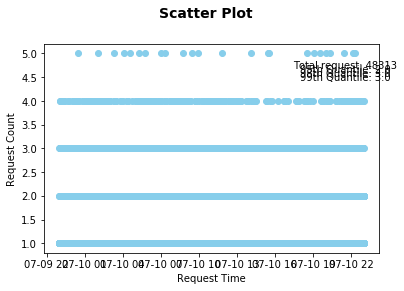

In [10]:
ninety_five_quant = grouped.quantile(.95)[0]  # [0] since we only need the quantile value
ninety_ninth_quant = grouped.quantile(.99)[0]  # [0] since we only need the quantile value
ninety_eight_quant = grouped.quantile(.98)[0]  # [0] since we only need the quantile value
total_req = 'Total request: ' + str(count)
nine_five_quant_str = '95th Quantile: ' + str(ninety_five_quant)
nine_eight_quant_str = '98th Quantile: ' + str(ninety_eight_quant)
nine_nine_quant_str = '99th Quantile: ' + str(ninety_ninth_quant)
# x and y axis values are extracted from the grouped DataFrame
x = grouped.index
y = grouped.values
# print 'Plotting Graph..'
fig = plt.figure()
fig.suptitle('Scatter Plot', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_xlabel('Request Time')
ax.set_ylabel('Request Count')
text_x_axis_value = 0.9
ax.text(text_x_axis_value, 0.90, total_req, horizontalalignment='center', verticalalignment='center',
        transform=ax.transAxes)
ax.text(text_x_axis_value, 0.88, nine_five_quant_str, horizontalalignment='center', verticalalignment='center',
        transform=ax.transAxes)
ax.text(text_x_axis_value, 0.86, nine_eight_quant_str, horizontalalignment='center', verticalalignment='center',
        transform=ax.transAxes)
ax.text(text_x_axis_value, 0.84, nine_nine_quant_str, horizontalalignment='center', verticalalignment='center',
        transform=ax.transAxes)
ax.plot_date(x, y, xdate=True, ydate=False, color='skyblue')
plt.show()

# fig.savefig('plot.png')

In [11]:
dt_lst_2 = []

for line in lines:
    serial_num = re.search('ser=[a-zA-Z0-9]+\\s{1}', line)
    sl_line = serial_num.group().strip().replace("ser=","")
    dt_lst_2.append(sl_line)


In [12]:
global count, grouped
    # Create a Series named "Request_Time"
sr_dt = Series(dt_lst, name='Request_Time')
# Create a DataFrame using the Request_Time Series
df = DataFrame(sr_dt)
# Create an array of 1's using Numpy
count = sr_dt.size
ones = np.ones(count, dtype=int)
# Add the ones array to the DataFrame with the header "Counts"
df['Counts'] = ones

df['Serial'] = Series(dt_lst_2, name='Serial')


In [13]:
df.groupby(['Serial','Request_Time'], as_index=False).sum()
# df.groupby('Serial').sum()

,Serial,Request_Time,Counts
0,002613306721,2019-07-09 23:33:54,1
1,002613306721,2019-07-10 00:32:33,1
2,002613306721,2019-07-10 01:32:31,1
3,002613306721,2019-07-10 02:33:39,1
4,002613306721,2019-07-10 03:32:42,1
5,002613306721,2019-07-10 04:35:03,1
6,002613306721,2019-07-10 05:43:39,1
7,002613306721,2019-07-10 06:33:18,1
8,002613306721,2019-07-10 07:34:46,1
9,002613306721,2019-07-10 08:35:04,1


In [28]:
result = sr_dt.groupby(sr_dt.dt.to_period('H')).count()
print(result)

Request_Time
2019-07-09 23:00    2059
2019-07-10 00:00    2070
2019-07-10 01:00    2063
2019-07-10 02:00    2114
2019-07-10 03:00    2223
2019-07-10 04:00    2045
2019-07-10 05:00    2080
2019-07-10 06:00    2094
2019-07-10 07:00    2246
2019-07-10 08:00    2260
2019-07-10 09:00    2239
2019-07-10 10:00    2113
2019-07-10 11:00    2225
2019-07-10 12:00    2044
2019-07-10 13:00    1996
2019-07-10 14:00    1845
2019-07-10 15:00    1706
2019-07-10 16:00    1653
2019-07-10 17:00    1569
2019-07-10 18:00    1580
2019-07-10 19:00    1631
2019-07-10 20:00    1909
2019-07-10 21:00    2231
2019-07-10 22:00    2280
2019-07-10 23:00      38
Freq: H, Name: Request_Time, dtype: int64


In [ ]:
df.groupby('Serial').count().sort_values(['Counts'],ascending=False).iloc[0].name

In [15]:
df.loc[df['Serial'] == df.groupby('Serial').count().sort_values(['Counts'],ascending=False).iloc[0].name]

,Request_Time,Counts,Serial
152,2019-07-09 23:08:51,1,0123456789ABCDEF
869,2019-07-09 23:49:37,1,0123456789ABCDEF
1005,2019-07-09 23:57:39,1,0123456789ABCDEF
1433,2019-07-10 01:57:39,1,0123456789ABCDEF
1628,2019-07-10 01:08:36,1,0123456789ABCDEF
1937,2019-07-10 01:26:25,1,0123456789ABCDEF
2217,2019-07-10 02:08:51,1,0123456789ABCDEF
2950,2019-07-10 02:49:37,1,0123456789ABCDEF
3078,2019-07-10 02:56:17,1,0123456789ABCDEF
3526,2019-07-10 02:57:39,1,0123456789ABCDEF


In [16]:
df.groupby('Serial').count().sort_values(['Counts'],ascending=False).head(3)

,Request_Time,Counts
Serial,,
0123456789ABCDEF,130,130
LenovoTAB2A8,81,81
988a163058484f484e,73,73


In [17]:
import seaborn as sns

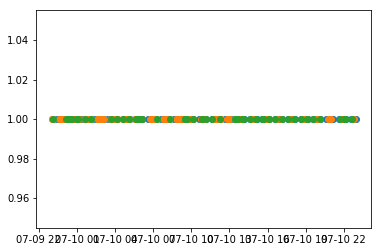

In [18]:
for i in range(3):
    name = df.groupby('Serial').count().sort_values(['Counts'],ascending=False).iloc[i].name
    result = df.loc[df['Serial']== name]
    plt.plot_date(result['Request_Time'],result['Counts'])

plt.rcParams["figure.figsize"] = (500,1)
plt.show()
#fig.savefig('plot.png')